In [68]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "D:\\EDA datasets PW skills\\amazon.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Remove currency symbols and commas from prices and ratings, then convert them to numeric types
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].replace('[%,]', '', regex=True).astype(float)

# Replace the '|' character with NaN in the 'rating' column
df['rating'] = df['rating'].replace('|', np.nan).astype(float)

# Convert the 'rating_count' column to numeric after removing commas
df['rating_count'] = df['rating_count'].replace('[,]', '', regex=True).astype(float)

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [70]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       24269.0   
1         349.0       

In [92]:
"""1. What is the average rating for each product category?"""

# Group by 'category' and calculate the average rating
average_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Display the result
print(average_rating_by_category)


                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


In [74]:
"""2.	What are the top rating_count products by category?"""
# Sort the dataframe by 'rating_count' within each category and get the top products
top_rating_count_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()]

# Display the result
print(top_rating_count_by_category[['category', 'product_name', 'rating_count']])


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4426.0  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7222.0  
748

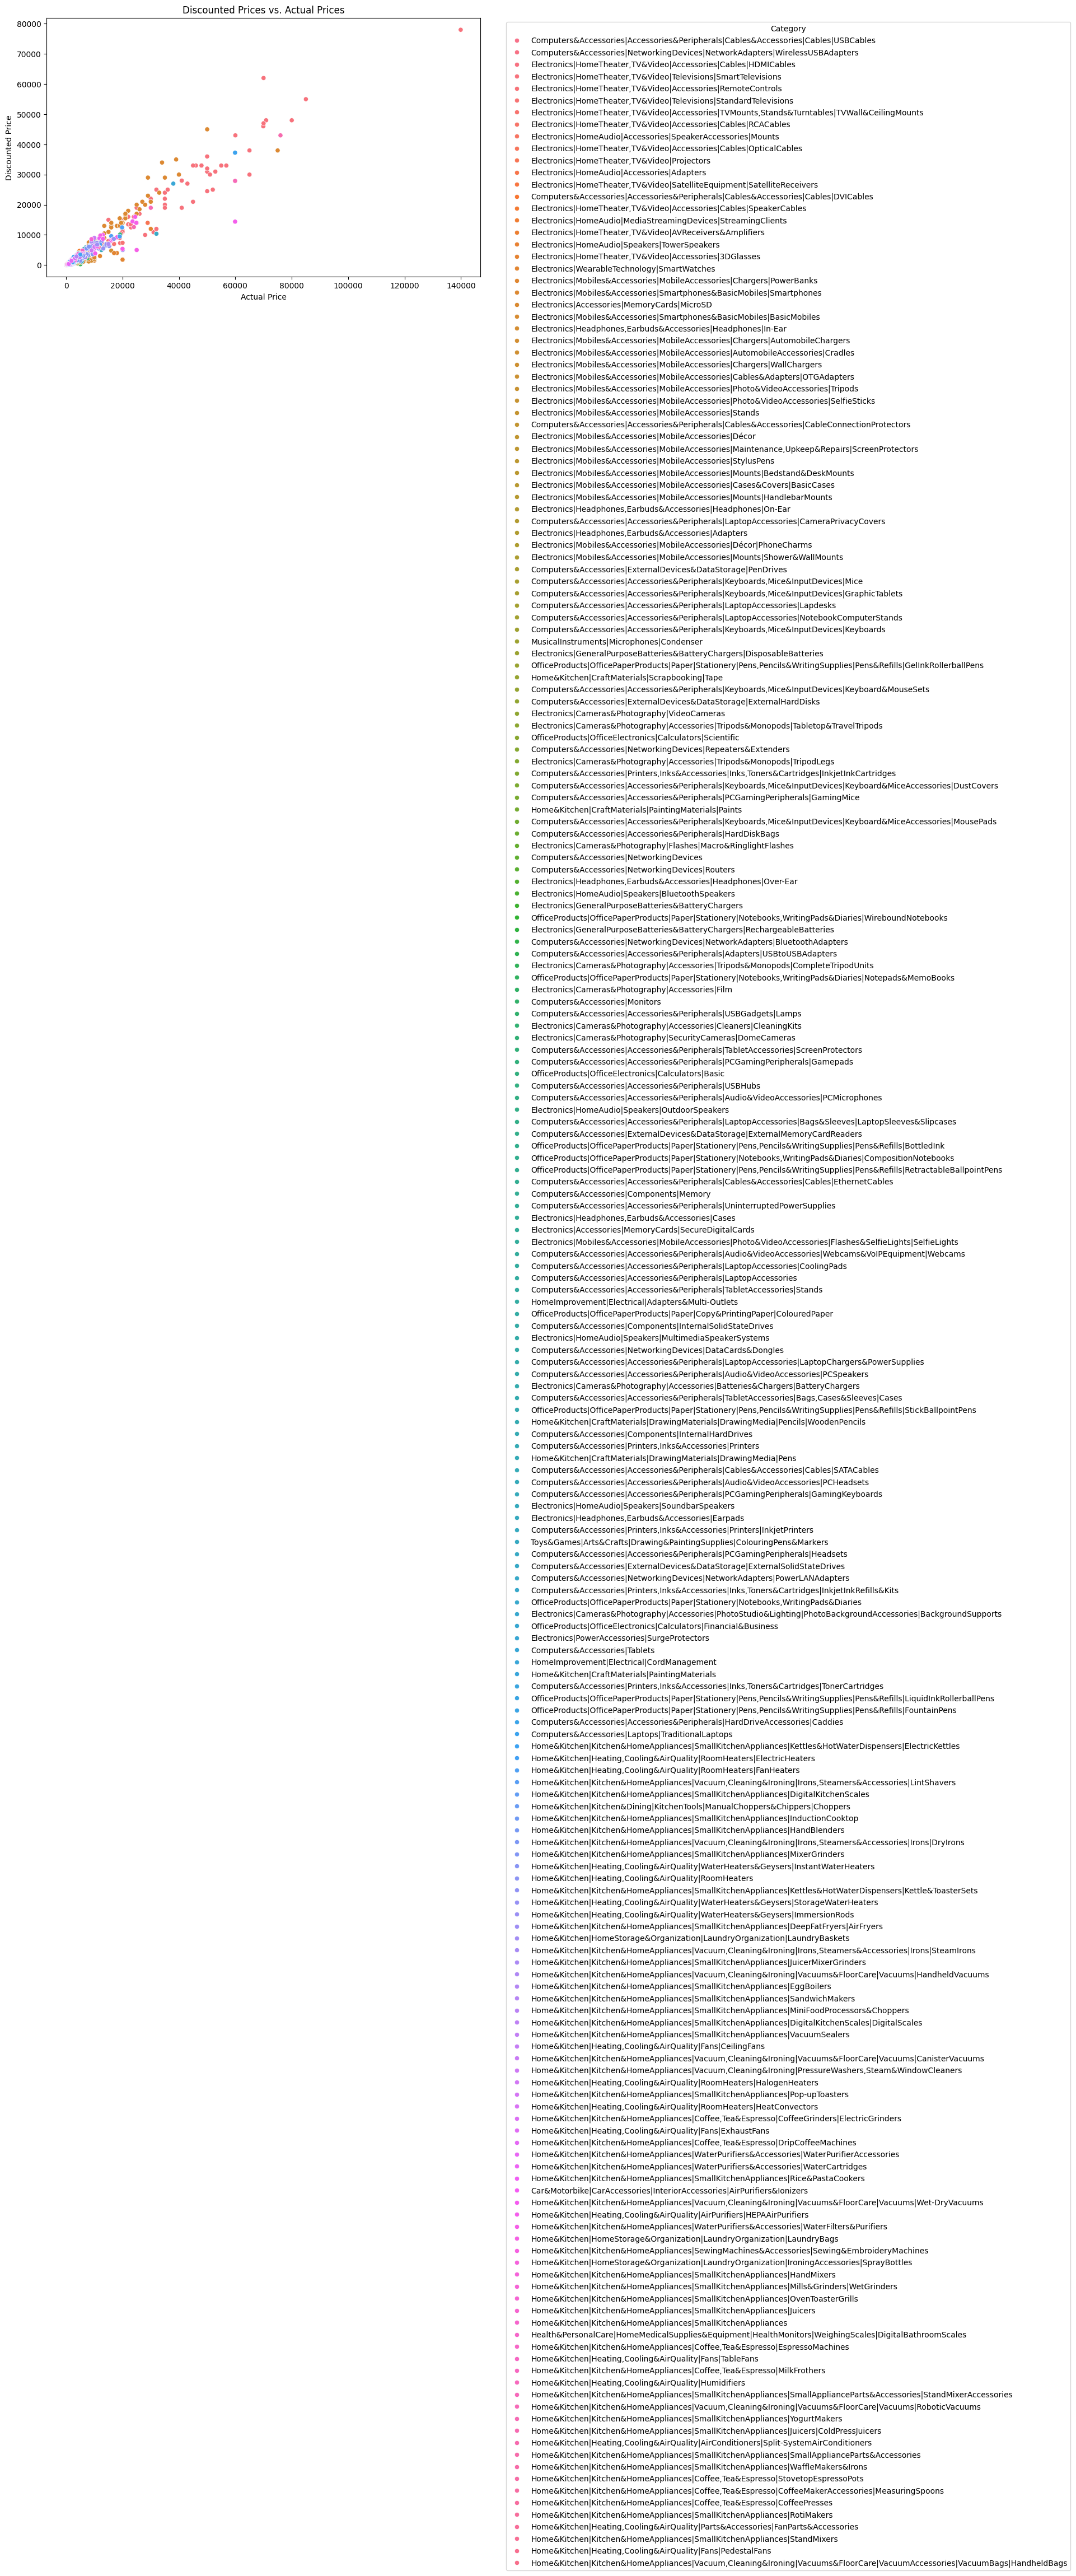

In [76]:
"""3.	What is the distribution of discounted prices vs. actual prices ?"""

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of discounted prices vs. actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', hue='category')

# Set the title and labels
plt.title('Discounted Prices vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')

# Move the legend to the right side of the plot
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()



In [77]:
"""4.	How does the average discount percentage vary across categories?"""
# Group by 'category' and calculate the average discount percentage
average_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# Display the result
print(average_discount_by_category)


                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [78]:
"""5.	 What are the most popular product names?"""
# Popularity by rating_count
most_popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head()

# Display the result
print(most_popular_products)


product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713.0
Name: rating_count, dtype: float64


In [79]:
"""6.	What are the most popular product keywords?"""
from collections import Counter
import re

# Combine all product names into a single string
all_product_names = ' '.join(df['product_name'])

# Extract words and count their frequency
word_list = re.findall(r'\b\w+\b', all_product_names.lower())
word_freq = Counter(word_list).most_common(10)

# Display the result
print(word_freq)


[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267)]


In [80]:
"""7.	What are the most popular product reviews?"""
# Popularity by rating_count
most_popular_reviews = df.groupby('review_content')['rating_count'].sum().sort_values(ascending=False).head()

# Display the result
print(most_popular_reviews)


review_content
I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,All good,It's the best HDMI cable at this price range. No problems yet. Just go for it !!,I was expecting this to be delivered on time and it was delivered on time.Product is good as i have tried other cables and wires from Amazon basica brand.,Good one                                                                                    

In [81]:
"""8.	What is the correlation between discounted_price and rating?"""
# Calculate correlation between 'discounted_price' and 'rating'
correlation = df[['discounted_price', 'rating']].corr()

# Display the correlation
print(correlation)


                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [82]:
"""9.	What are the Top 5 categories based on the highest ratings?"""
# Group by 'category' and calculate the average rating, then sort to get the top 5
top_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

# Display the result
print(top_categories_by_rating)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [83]:
"""10.	Identify any potential areas for improvement or optimization based on the data analysis."""
# Example: Identify categories with low average ratings
categories_needing_improvement = df.groupby('category')['rating'].mean().sort_values().head(5)

# Display the result
print(categories_needing_improvement)


category
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.5
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters                                          3.6
Name: rating, dtype: float64
